# Assignment 3, Part A
Multi-Layer Perceptron (MLP) neural network models developed to classify handwritten digits (0-9)
from the MNIST (Modified National Institute of Standards and Technology) Dataset. Models created
based on unique specifications for eachexperiment. The MLP model will be trained using the
Backpropagation algorithm that implemented using the mini-batch Stochastic Gradient Descent (SGD)
optimization algorithm.

Mini-batch size set to 64. Network trained to 50 epochs with early stopping enabled.

### MNIST (Modified National Institute of Standards and Technology) Dataset
Set of 70,000 small images of digits handwritten by high school students and employees of the US
Census Bureau. Each image is labeled with the digit it represents. The train set contains 60,000 
images, from which you should randomly select 5000 images as the validation set. 

##### Source:
- Data loaded directly using the Keras API: https://keras.io/api/datasets/mnist/ 

##### Input variables:
- 28x28=784 greyscale pixels
    - Pixel intensity: 0 (white) to 255 (black)

##### Output variable: 
- 10 classes representing integer values from 0 to 9


In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve

## Load Data & Display Dataset Information

In [3]:
# Load the MNIST dataset using Keras
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show the shape of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Print the minimum and maximum values of the training data
print("x_train Min:", np.min(x_train))
print("x_train Max:", np.max(x_train))
print("y_train Min:", np.min(y_train))
print("y_train Max:", np.max(y_train))

print("x_train dtype:", x_train.dtype)
print("y_train dtype:", y_train.dtype)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_train Min: 0
x_train Max: 255
y_train Min: 0
y_train Max: 9
x_train dtype: uint8
y_train dtype: uint8


Training ( 0 ) -  5923 ; Test ( 0 ) -  980
Training ( 1 ) -  6742 ; Test ( 1 ) -  1135
Training ( 2 ) -  5958 ; Test ( 2 ) -  1032
Training ( 3 ) -  6131 ; Test ( 3 ) -  1010
Training ( 4 ) -  5842 ; Test ( 4 ) -  982
Training ( 5 ) -  5421 ; Test ( 5 ) -  892
Training ( 6 ) -  5918 ; Test ( 6 ) -  958
Training ( 7 ) -  6265 ; Test ( 7 ) -  1028
Training ( 8 ) -  5851 ; Test ( 8 ) -  974
Training ( 9 ) -  5949 ; Test ( 9 ) -  1009


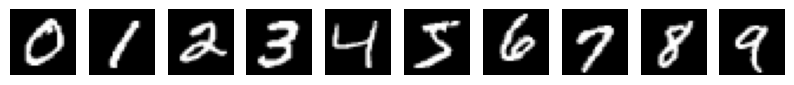

In [4]:

# Print the number of samples for each class
for i in range(10):
    print("Training (", i, ") - ", np.sum(y_train == i), "; Test (", i, ") - ", np.sum(y_test == i))

# Display the first training image for each class
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    plt.axis('off')

## Data Pre-processing


In [5]:
# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train Min:", np.min(x_train))
print("x_train Max:", np.max(x_train))
print("x_train dtype:", x_train.dtype)

x_train Min: 0.0
x_train Max: 1.0
x_train dtype: float64


In [6]:
# Convert the labels to the appropriate datatype for TensorFlow
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

## Data Analysis

In [7]:
def list_maximum_pairs_symmetric_matrix(sym_matrix, num_pairs):
    tmp = sym_matrix.copy()
    tmp = np.triu(tmp, k=1)

    print(f"Top {num_pairs} pairs:")
    for i in range(num_pairs):
        max_idx = np.unravel_index(np.argmax(tmp), tmp.shape)
        print(f"({max_idx[0]}, {max_idx[1]}) => {np.round(sym_matrix[max_idx], 4)}")
        tmp[max_idx] = 0

Top 10 pairs:
(4, 9) => 0.8979
(5, 8) => 0.8688
(7, 9) => 0.8541
(3, 5) => 0.8489
(3, 8) => 0.818
(8, 9) => 0.7985
(2, 8) => 0.7903
(2, 6) => 0.7696
(0, 5) => 0.7597
(5, 9) => 0.7526


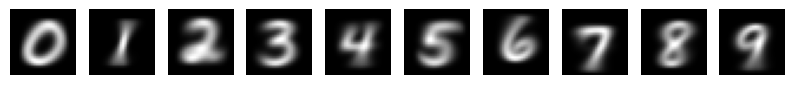

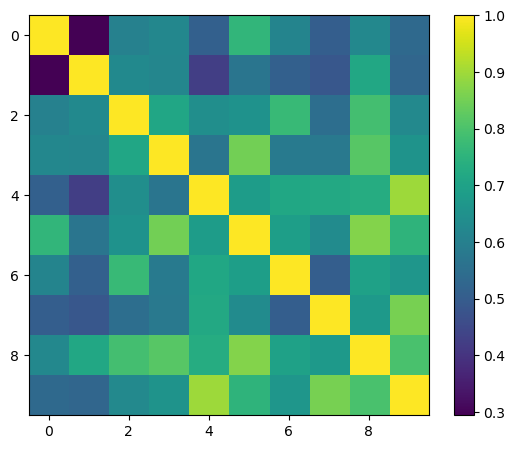

In [8]:
# Average the pixel values for each class
class_means = np.zeros((10, 28, 28))
for i in range(10):
    class_means[i] = np.mean(x_train[y_train == i], axis=0)

# Display the average images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(class_means[i], cmap='gray')
    plt.axis('off')

# Look at the correlation between the average images of each class
corr = np.corrcoef(class_means.reshape(10, -1))

# Print the top 5 correlated pairs (excluding the diagonal and lower triangle)
list_maximum_pairs_symmetric_matrix(corr, 10)

# Display the correlation matrix as an image
plt.figure(figsize=(5,4))
plt.imshow(corr)
plt.colorbar()
plt.gca().set_aspect('auto')
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)


## Partition the Dataset into Train & Validation Subsets

In [9]:
# Randomly select 5000 samples from the training data for the training set
np.random.seed(42)
val_size = 5000
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_size, random_state=42, stratify=y_train
)

# Show the shape of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

# Show the number of samples for each class
for i in range(10):
    print("Training (", i, ") - ", np.sum(y_train == i), "; Validation (", i, ") - ", np.sum(y_val == i))

x_train shape: (55000, 28, 28)
y_train shape: (55000,)
x_val shape: (5000, 28, 28)
y_val shape: (5000,)
Training ( 0 ) -  5429 ; Validation ( 0 ) -  494
Training ( 1 ) -  6180 ; Validation ( 1 ) -  562
Training ( 2 ) -  5462 ; Validation ( 2 ) -  496
Training ( 3 ) -  5620 ; Validation ( 3 ) -  511
Training ( 4 ) -  5355 ; Validation ( 4 ) -  487
Training ( 5 ) -  4969 ; Validation ( 5 ) -  452
Training ( 6 ) -  5425 ; Validation ( 6 ) -  493
Training ( 7 ) -  5743 ; Validation ( 7 ) -  522
Training ( 8 ) -  5364 ; Validation ( 8 ) -  487
Training ( 9 ) -  5453 ; Validation ( 9 ) -  496


In [10]:
# Balance the dataset by randomly oversampling the minority classes
max_train_samples = np.max([np.sum(y_train == i) for i in range(10)])
max_val_samples = np.max([np.sum(y_val == i) for i in range(10)])

print("max_train_samples:", max_train_samples)
print("max_val_samples:", max_val_samples)

max_train_samples: 6180
max_val_samples: 562


In [11]:
# Create a simple keras model that will augment the minority classes to have a uniform distribution
# Limit rotation to 3.6 degrees (~0.06 radians ~ 2*pi * 1%)
# augmenter = tf.keras.Sequential([
#     tf.keras.layers.RamdomRotation(0.01)
# ])

# x_train_augmented.append(augmenter(x_train[y_train == i][0]))

I originally wanted to augment the data with slight rotations, but was running into versioning
issues with TensorFlow to utilize the rotation feature. So for this exercise, I just chose to
oversample to minority classes. I made sure to do the oversampling after the training-validation
split to ensure that I didn't end up with the same images in the training and validation sets.

In [12]:
# Create a new dataset with the augmented images
x_train_augmented = []
y_train_augmented = []

x_val_augmented = []
y_val_augmented = []

np.random.seed(42)

for i in range(10):
    num_train_class_samples = np.sum(y_train == i)
    num_val_class_samples = np.sum(y_val == i)

    num_train_aug_samples = max_train_samples - num_train_class_samples
    num_val_aug_samples = max_val_samples - num_val_class_samples

    tmp_samples = x_train[y_train == i]

    for _ in range(num_train_aug_samples):
        x_train_augmented.append(tmp_samples[np.random.randint(num_train_class_samples)])
        y_train_augmented.append(np.int64(i))

    tmp_samples = x_val[y_val == i]

    for _ in range(num_val_aug_samples):
        x_val_augmented.append(tmp_samples[np.random.randint(num_val_class_samples)])
        y_val_augmented.append(np.int64(i))

x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

x_train_balanced = np.concatenate((x_train, x_train_augmented))
y_train_balanced = np.concatenate((y_train, y_train_augmented))

x_val_augmented = np.array(x_val_augmented)
y_val_augmented = np.array(y_val_augmented)

x_val_balanced = np.concatenate((x_val, x_val_augmented))
y_val_balanced = np.concatenate((y_val, y_val_augmented))

for i in range(10):
    print(
        "Training (", i, ") -", np.sum(y_train_balanced == i), ";",
        "Validation (", i, ") - ", np.sum(y_val_balanced == i)
    )

Training ( 0 ) - 6180 ; Validation ( 0 ) -  562
Training ( 1 ) - 6180 ; Validation ( 1 ) -  562
Training ( 2 ) - 6180 ; Validation ( 2 ) -  562
Training ( 3 ) - 6180 ; Validation ( 3 ) -  562
Training ( 4 ) - 6180 ; Validation ( 4 ) -  562
Training ( 5 ) - 6180 ; Validation ( 5 ) -  562
Training ( 6 ) - 6180 ; Validation ( 6 ) -  562
Training ( 7 ) - 6180 ; Validation ( 7 ) -  562
Training ( 8 ) - 6180 ; Validation ( 8 ) -  562
Training ( 9 ) - 6180 ; Validation ( 9 ) -  562


## Helper Functions
The following helper functions are inteded to be used througout all experiments.

In [13]:
def plot_learning_curves(history, title):
    numOfEpochs = history.epoch[-1]+1
    plt.figure(figsize=(18,6))

    plt.subplot(121)
    plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation', color="r")
    plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training', color="b")
    plt.legend(loc=0, fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.xlim([1,numOfEpochs])
    plt.grid(True)
    plt.title("Model Accuracy: "+title)
    
    plt.subplot(122)
    plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation', color="r")
    plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training', color="b")
    plt.legend(loc=0, fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.xlim([1,numOfEpochs])
    plt.grid(True)
    plt.title("Model Loss: "+title)
    
    plt.show() 

In [14]:
def calculate_tar_at_far(y_true, y_pred, far, show_curve=False):
    fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label=1)
    
    if show_curve:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
    
    return tpr[fpr >= far][0]

In [15]:
# Create an early stopping callback for use across all experiments
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='auto',
    min_delta=0,
    patience=10,
    restore_best_weights=True
)

In [16]:
def training_wrapper(ex_num, model, n_epochs, batch_size, x_train, y_train, x_val, y_val, cbs=[]):
    print(f"Starting Experiment {ex_num}...")
    print()
    print("**************************************************************************************")
    print("********************************    TRAINING MODEL    ********************************")
    print("**************************************************************************************")
    history = model.fit(
        x_train, 
        y_train, 
        epochs=n_epochs,
        batch_size=batch_size, 
        validation_data=(x_val, y_val), 
        callbacks=cbs
    )

    print()
    print("***************************************************************************************")
    print("******************************    EVALUATING TRAINING    ******************************")
    print("***************************************************************************************")
    print()
    plot_learning_curves(history, f"Experiment {ex_num}")

    return model, history

In [17]:
def evaluation_wrapper(ex_num, model, x_train, y_train, x_test, y_test, far_list=[], plot_roc=False):
    print(f"Starting Evaluation for Experiment {ex_num}...")
    
    y_pred = model.predict(x_test, verbose=0)
    y_pred = np.argmax(y_pred, axis=1)
    
    print()
    print("**************************************************************************************")
    print("***************************    EVALUATING TRAINED MODEL    ***************************")
    print("**************************************************************************************")
    print()
    train_accuracy = accuracy_score(y_train, np.argmax(model.predict(x_train, verbose=0), axis=1))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Train Accuracy: {np.round(train_accuracy, 4)}")
    print(f"Test Accuracy: {np.round(test_accuracy, 4)}")
    print()
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    # print()
    # print("Classification Report:")
    # print(classification_report(y_test, y_pred))
    
    print()
    print("***************************************************************************************")
    print("*********************************    EXTRA METRICS    *********************************")
    print("***************************************************************************************")
    print()
    for far in far_list:
        tar_at_far = calculate_tar_at_far(y_test, y_pred, far)
        print(f"TAR @ FAR={far*100}%: {np.round(tar_at_far, 4)*100}%")
    if plot_roc:
        print()
        _ = calculate_tar_at_far(y_test, y_pred, 0.01, show_curve=True)

    print()
    print("Misclassified digits...")
    # Using the confusion matrix, list the top ten most confused pairs of digits
    list_maximum_pairs_symmetric_matrix(conf_matrix, 10)
    
    return y_pred

## Experiment 1
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): zeros
- activation (hidden layers): sigmoid
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [18]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='sigmoid', kernel_initializer='zeros', name='hidden1'),
    tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='zeros', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='zeros', name='output')
])

optimizer_ex1 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1.compile(optimizer=optimizer_ex1, loss=loss_fn_ex1, metrics=['accuracy'])

model_ex1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Train Model

Starting Experiment 1...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 2.3089 - accuracy: 0.1033 - val_loss: 2.3080 - val_accuracy: 0.1044
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 2.3055 - accuracy: 0.1041 - val_loss: 2.3044 - val_accuracy: 0.0992
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.1100 - val_loss: 2.2984 - val_accuracy: 0.1124
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 2.2761 - accuracy: 0.1296 - val_loss: 2.2187 - val_accuracy: 0.2076
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 2.0875 - accuracy: 0.2500 - val_loss: 1.9799 - val_accuracy: 0.2784
Epo

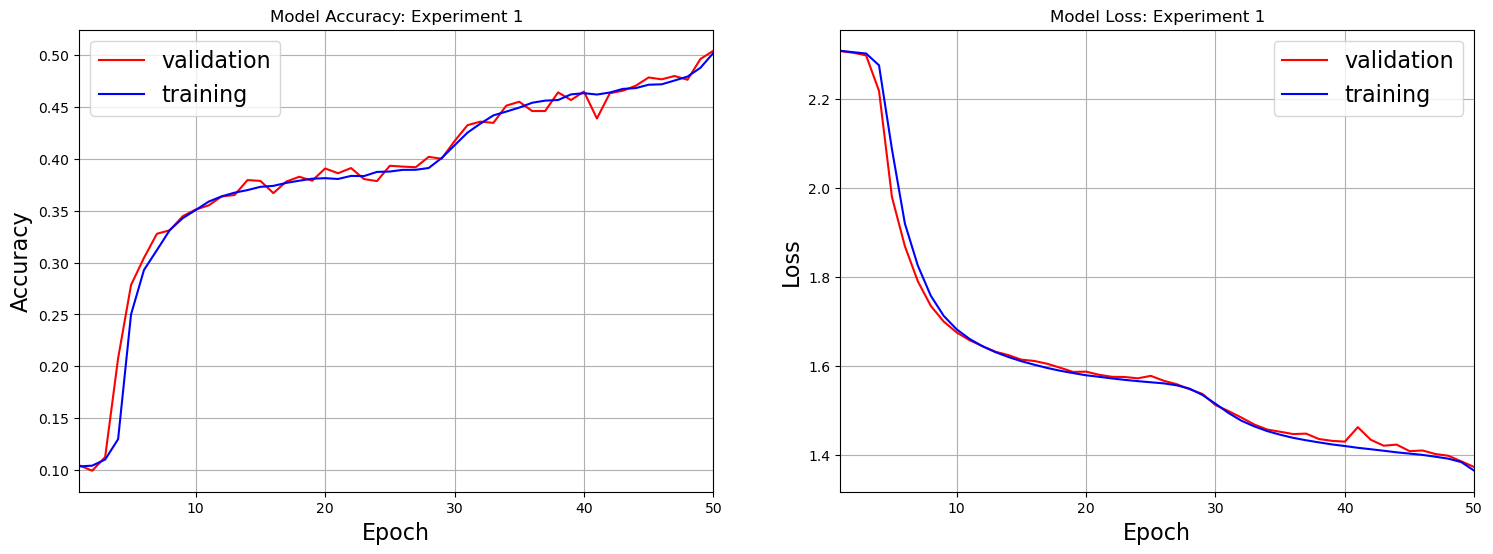

CPU times: total: 15min 52s
Wall time: 1min 23s


In [19]:
%%time
model_ex1, history_ex1 = training_wrapper(
    ex_num=1,
    model=model_ex1,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [20]:
y_pred_ex1 = evaluation_wrapper(
    ex_num=1,
    model=model_ex1,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.5066
Test Accuracy: 0.5103

Confusion Matrix:
[[ 904    0    2    3    0   45   26    0    0    0]
 [   0 1021    6    4    7    1    0   67    0   29]
 [  12    3  354  251   54   31  292    8    0   27]
 [   4   11  133  479  137   88   32   40    0   86]
 [   0   25   36  172  283    3    7   99    0  357]
 [  24    1  160  231   34  345   73   11    0   13]
 [  46    0  142   33    5   20  708    2    0    2]
 [   0  280    5   38   40    6    1  516    0  142]
 [   8    7  179  472  122   35   63   29    0   59]
 [   1   51    9   48  112    5    5  285    0  493]]

***************************************************************************************
*************

## Experiment 2
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): ones
- activation (hidden layers): sigmoid
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [21]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='sigmoid', kernel_initializer='ones', name='hidden1'),
    tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='ones', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='ones', name='output')
])

optimizer_ex2 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex2 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex2.compile(optimizer=optimizer_ex2, loss=loss_fn_ex2, metrics=['accuracy'])

model_ex2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Train Model

Starting Experiment 2...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 2.3856 - accuracy: 0.1017 - val_loss: 2.5220 - val_accuracy: 0.0974
Epoch 2/50
860/860 [==============================] - 1s 1ms/step - loss: 2.3814 - accuracy: 0.1004 - val_loss: 2.4188 - val_accuracy: 0.0904
Epoch 3/50
860/860 [==============================] - 1s 1ms/step - loss: 2.3814 - accuracy: 0.1019 - val_loss: 2.4293 - val_accuracy: 0.1044
Epoch 4/50
860/860 [==============================] - 1s 1ms/step - loss: 2.3790 - accuracy: 0.1012 - val_loss: 2.5055 - val_accuracy: 0.1124
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 2.3805 - accuracy: 0.1016 - val_loss: 2.4413 - val_accuracy: 0.0988
Epo

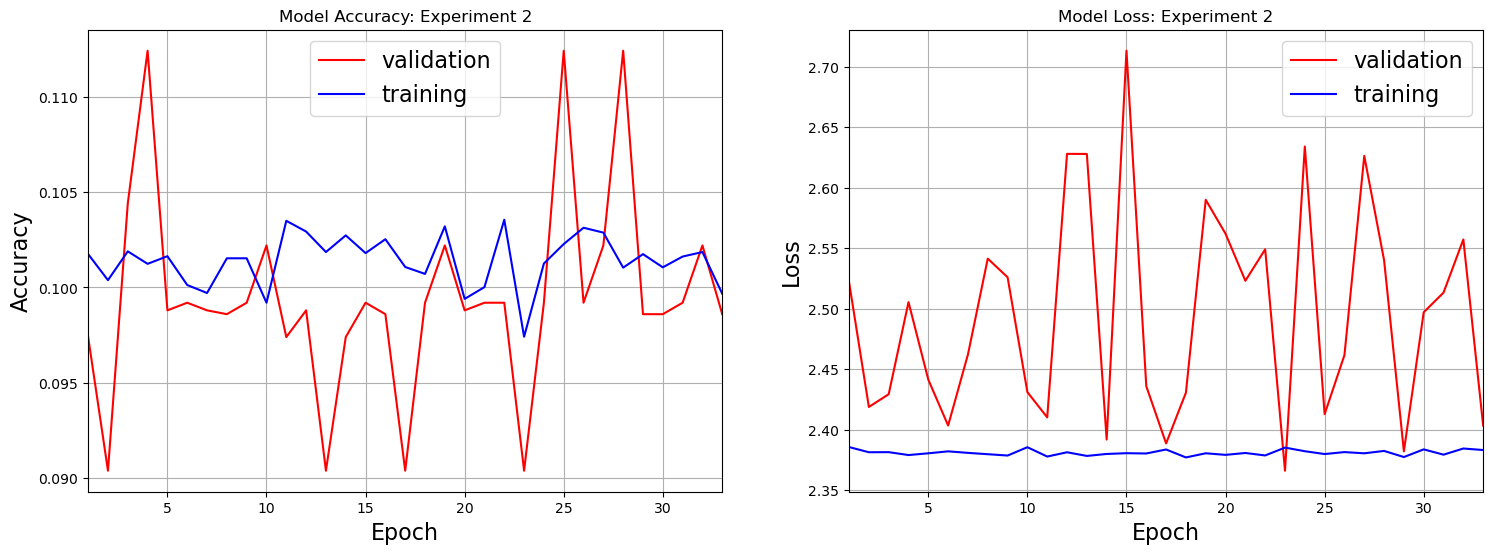

CPU times: total: 10min 17s
Wall time: 53.9 s


In [22]:
%%time
model_ex2, history_ex2 = training_wrapper(
    ex_num=2,
    model=model_ex2,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [23]:
y_pred_ex2 = evaluation_wrapper(
    ex_num=2,
    model=model_ex2,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 2...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.0903
Test Accuracy: 0.0892

Confusion Matrix:
[[   0    0    0    0    0  980    0    0    0    0]
 [   0    0    0    0    0 1135    0    0    0    0]
 [   0    0    0    0    0 1032    0    0    0    0]
 [   0    0    0    0    0 1010    0    0    0    0]
 [   0    0    0    0    0  982    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0  958    0    0    0    0]
 [   0    0    0    0    0 1028    0    0    0    0]
 [   0    0    0    0    0  974    0    0    0    0]
 [   0    0    0    0    0 1009    0    0    0    0]]

***************************************************************************************
*************

## Experiment 3
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): sigmoid
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [24]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='sigmoid', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex3 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex3 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex3.compile(optimizer=optimizer_ex3, loss=loss_fn_ex3, metrics=['accuracy'])

model_ex3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Train Model

Starting Experiment 3...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 1.7111 - accuracy: 0.4502 - val_loss: 0.8388 - val_accuracy: 0.7418
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.8376 - val_loss: 0.4660 - val_accuracy: 0.8658
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.4048 - accuracy: 0.8849 - val_loss: 0.3849 - val_accuracy: 0.8946
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.3495 - accuracy: 0.8999 - val_loss: 0.3439 - val_accuracy: 0.9040
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.3186 - accuracy: 0.9080 - val_loss: 0.3240 - val_accuracy: 0.9084
Epo

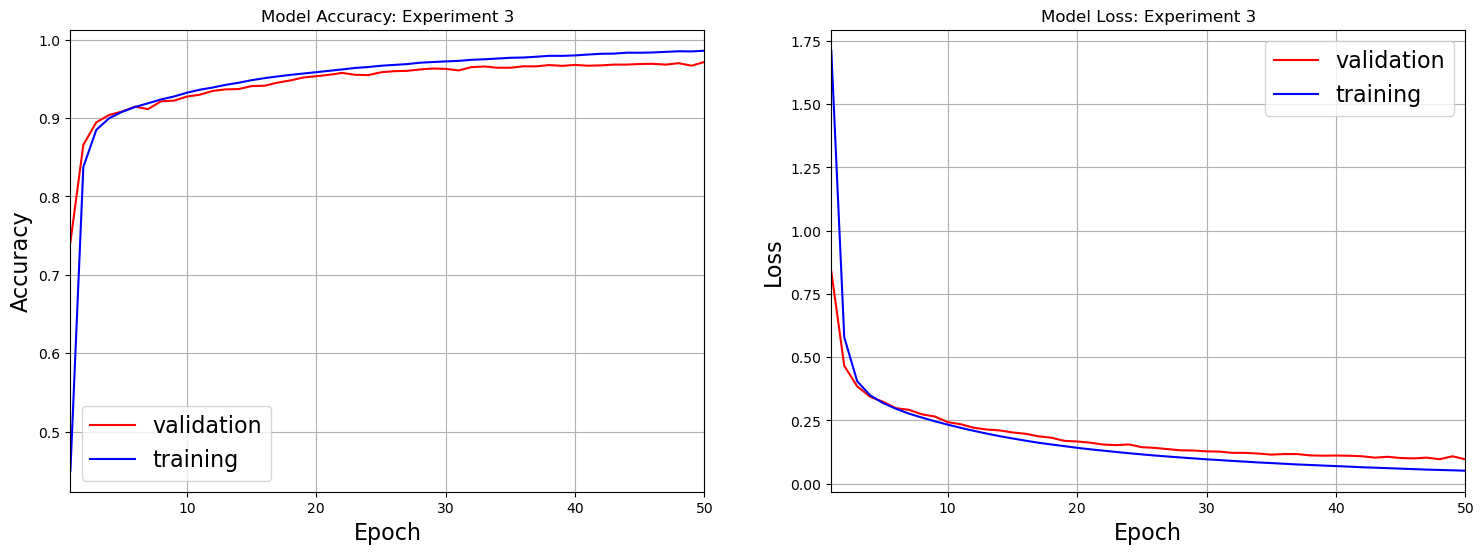

CPU times: total: 14min 13s
Wall time: 1min 12s


In [25]:
%%time
model_ex3, history_ex3 = training_wrapper(
    ex_num=3,
    model=model_ex3,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [26]:
y_pred_ex3 = evaluation_wrapper(
    ex_num=3,
    model=model_ex3,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 3...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9873
Test Accuracy: 0.9728

Confusion Matrix:
[[ 967    0    0    2    1    3    2    1    2    2]
 [   0 1127    2    1    0    1    2    0    2    0]
 [   5    1 1008    5    2    0    3    3    4    1]
 [   0    0    4  990    0    4    0    5    4    3]
 [   3    0    2    1  944    1    5    3    2   21]
 [   6    1    0    9    2  861    5    1    4    3]
 [   8    3    3    1    6    4  926    0    7    0]
 [   2   11   11    6    1    0    0  986    2    9]
 [   3    0    2    6    3    4    5    3  945    3]
 [   4    4    0   10    8    2    0    5    2  974]]

***************************************************************************************
*************

## Experiment 4
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): tanh
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [27]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='tanh', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dense(100, activation='tanh', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex4 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex4 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex4.compile(optimizer=optimizer_ex4, loss=loss_fn_ex4, metrics=['accuracy'])

model_ex4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Train Model

Starting Experiment 4...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 0.4214 - accuracy: 0.8861 - val_loss: 0.2894 - val_accuracy: 0.9122
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.2187 - accuracy: 0.9361 - val_loss: 0.2054 - val_accuracy: 0.9392
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1633 - accuracy: 0.9519 - val_loss: 0.1686 - val_accuracy: 0.9488
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1297 - accuracy: 0.9626 - val_loss: 0.1409 - val_accuracy: 0.9542
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.1234 - val_accuracy: 0.9616
Epo

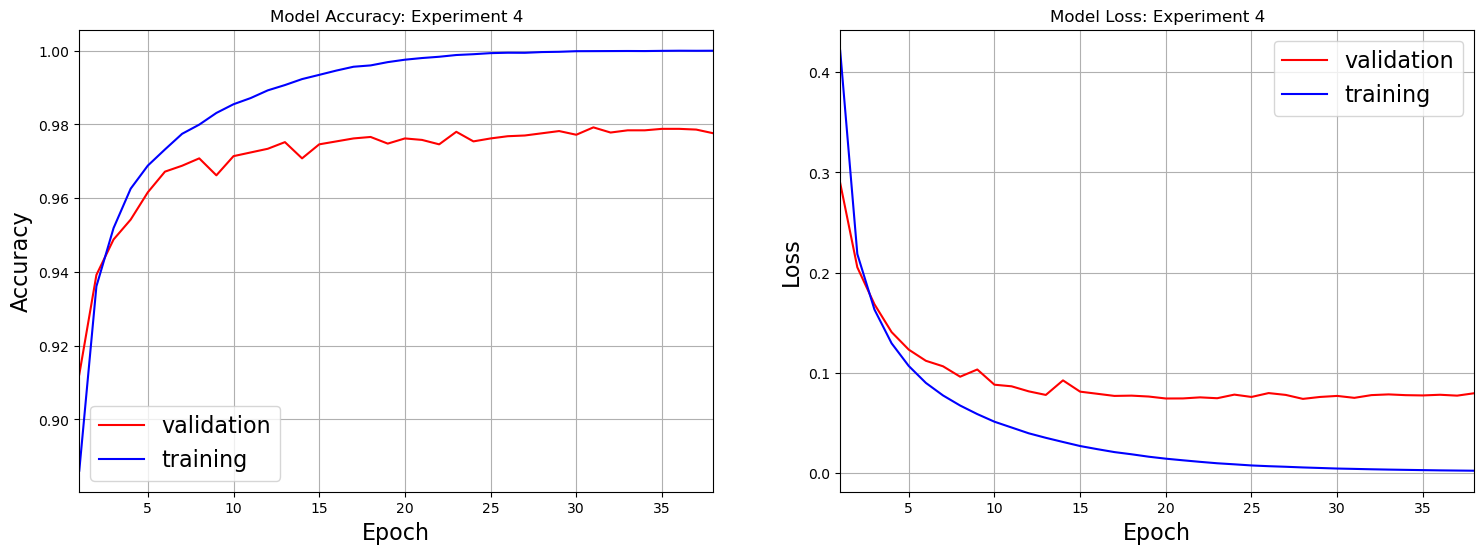

CPU times: total: 11min 11s
Wall time: 59.2 s


In [28]:
%%time
model_ex4, history_ex4 = training_wrapper(
    ex_num=4,
    model=model_ex4,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [29]:
y_pred_ex4 = evaluation_wrapper(
    ex_num=4,
    model=model_ex4,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 4...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9998
Test Accuracy: 0.9808

Confusion Matrix:
[[ 973    0    1    0    1    1    0    1    2    1]
 [   0 1126    2    2    0    1    2    1    1    0]
 [   4    0 1011    7    1    0    2    3    4    0]
 [   0    1    3  994    0    2    0    5    2    3]
 [   0    0    1    1  962    0    5    2    0   11]
 [   2    0    0   11    1  866    6    0    4    2]
 [   6    3    2    0    2    5  939    0    1    0]
 [   2    4    6    1    1    0    0 1009    2    3]
 [   2    0    4    4    2    5    1    4  949    3]
 [   3    3    0    5   12    2    0    4    1  979]]

***************************************************************************************
*************

## Experiment 5
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [30]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex5 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex5 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex5 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex5.compile(optimizer=optimizer_ex5, loss=loss_fn_ex5, metrics=['accuracy'])

model_ex5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Train Model

Starting Experiment 5...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 0.4320 - accuracy: 0.8781 - val_loss: 0.2695 - val_accuracy: 0.9162
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1715 - accuracy: 0.9499 - val_loss: 0.1681 - val_accuracy: 0.9506
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1181 - accuracy: 0.9646 - val_loss: 0.1257 - val_accuracy: 0.9632
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0889 - accuracy: 0.9734 - val_loss: 0.1096 - val_accuracy: 0.9650
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0992 - val_accuracy: 0.9678
Epo

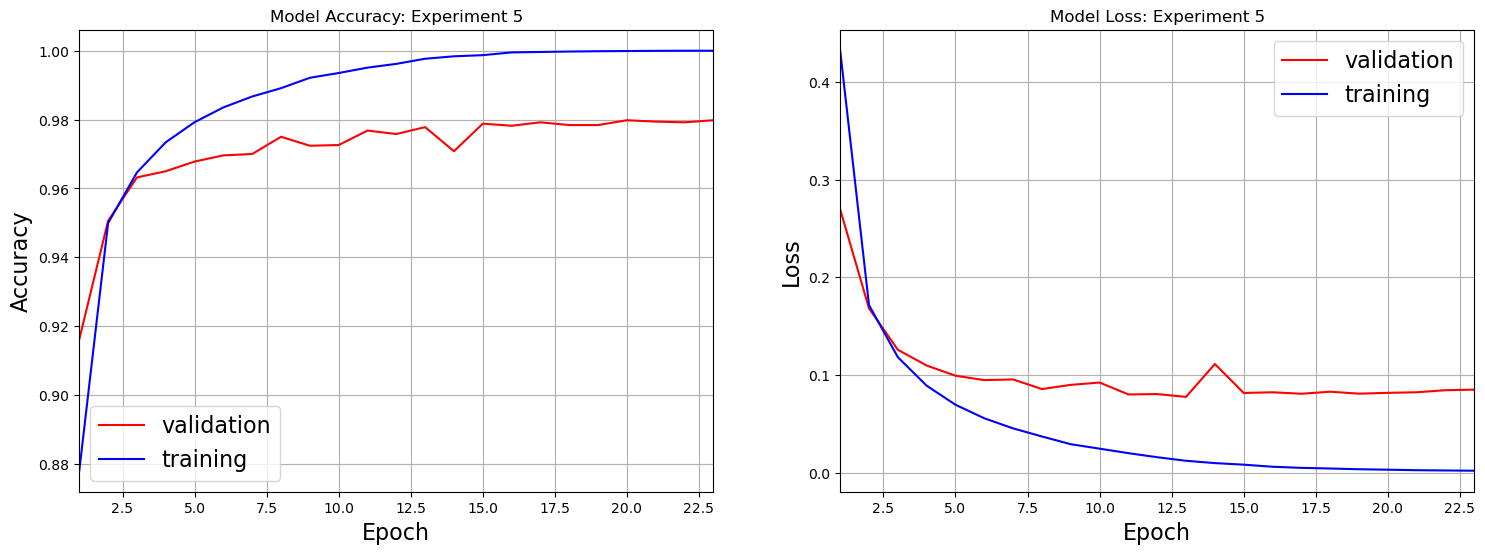

CPU times: total: 7min 26s
Wall time: 38.9 s


In [31]:
%%time
model_ex5, history_ex5 = training_wrapper(
    ex_num=5,
    model=model_ex5,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [32]:
y_pred_ex5 = evaluation_wrapper(
    ex_num=5,
    model=model_ex5,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 5...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9991
Test Accuracy: 0.9804

Confusion Matrix:
[[ 970    0    1    1    0    0    2    1    3    2]
 [   0 1126    1    1    0    1    3    1    2    0]
 [   2    2 1010    4    1    0    1    6    6    0]
 [   1    0    2  992    0    3    0    5    4    3]
 [   2    0    4    0  963    0    2    2    0    9]
 [   3    0    0    6    2  872    3    1    4    1]
 [   3    3    1    1    5    5  939    0    1    0]
 [   1    6    5    4    1    0    0 1004    2    5]
 [   2    0    3    4    2    3    2    3  951    4]
 [   3    2    0    8    6    2    2    4    5  977]]

***************************************************************************************
*************

## Experiment 6
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers)
    - Hidden layer 1: rate=0.1
    - Hidden layer 2: rate=0.1
- Max 50 epochs with early exit

### Construct and Compile Model

In [33]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex6 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex6 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex6 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex6.compile(optimizer=optimizer_ex6, loss=loss_fn_ex6, metrics=['accuracy'])

model_ex6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

### Train Model

Starting Experiment 6...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 2s 2ms/step - loss: 0.4795 - accuracy: 0.8603 - val_loss: 0.2595 - val_accuracy: 0.9192
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1974 - accuracy: 0.9414 - val_loss: 0.1585 - val_accuracy: 0.9518
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1388 - accuracy: 0.9587 - val_loss: 0.1260 - val_accuracy: 0.9618
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1094 - accuracy: 0.9671 - val_loss: 0.1048 - val_accuracy: 0.9696
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0892 - accuracy: 0.9733 - val_loss: 0.0989 - val_accuracy: 0.9692
Epo

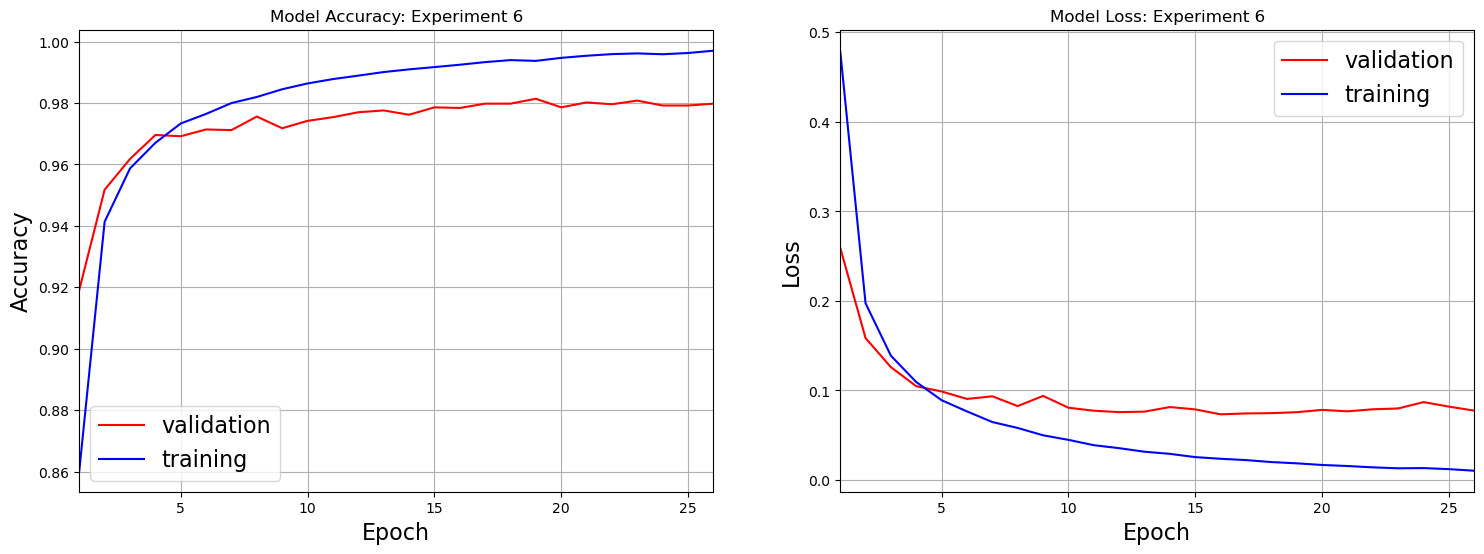

CPU times: total: 9min 23s
Wall time: 47.4 s


In [34]:
%%time
model_ex6, history_ex6 = training_wrapper(
    ex_num=6,
    model=model_ex6,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [35]:
y_pred_ex6 = evaluation_wrapper(
    ex_num=6,
    model=model_ex6,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 6...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9982
Test Accuracy: 0.9822

Confusion Matrix:
[[ 975    1    2    0    0    0    0    1    1    0]
 [   0 1128    0    1    0    1    1    2    2    0]
 [   3    1 1016    3    2    0    2    3    2    0]
 [   0    0    2  988    0    6    0    3    5    6]
 [   2    0    3    0  961    0    4    3    2    7]
 [   3    0    0    6    1  876    2    0    2    2]
 [   3    3    1    1    4    3  942    0    1    0]
 [   2    3   10    2    0    0    0 1002    4    5]
 [   4    0    1    7    0    2    2    3  954    1]
 [   3    2    0    5    9    3    2    3    2  980]]

***************************************************************************************
*************

## Experiment 7
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers)
    - Hidden layer 1: rate=0.5
    - Hidden layer 2: rate=0.1
- Max 50 epochs with early exit

### Construct and Compile Model

In [36]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex7 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex7 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex7 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex7.compile(optimizer=optimizer_ex7, loss=loss_fn_ex7, metrics=['accuracy'])

model_ex7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

### Train Model

Starting Experiment 7...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.5645 - accuracy: 0.8274 - val_loss: 0.2458 - val_accuracy: 0.9228
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.2473 - accuracy: 0.9271 - val_loss: 0.1649 - val_accuracy: 0.9504
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1944 - accuracy: 0.9417 - val_loss: 0.1352 - val_accuracy: 0.9580
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1622 - accuracy: 0.9508 - val_loss: 0.1210 - val_accuracy: 0.9630
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1437 - accuracy: 0.9555 - val_loss: 0.1113 - val_accuracy: 0.9652
Epo

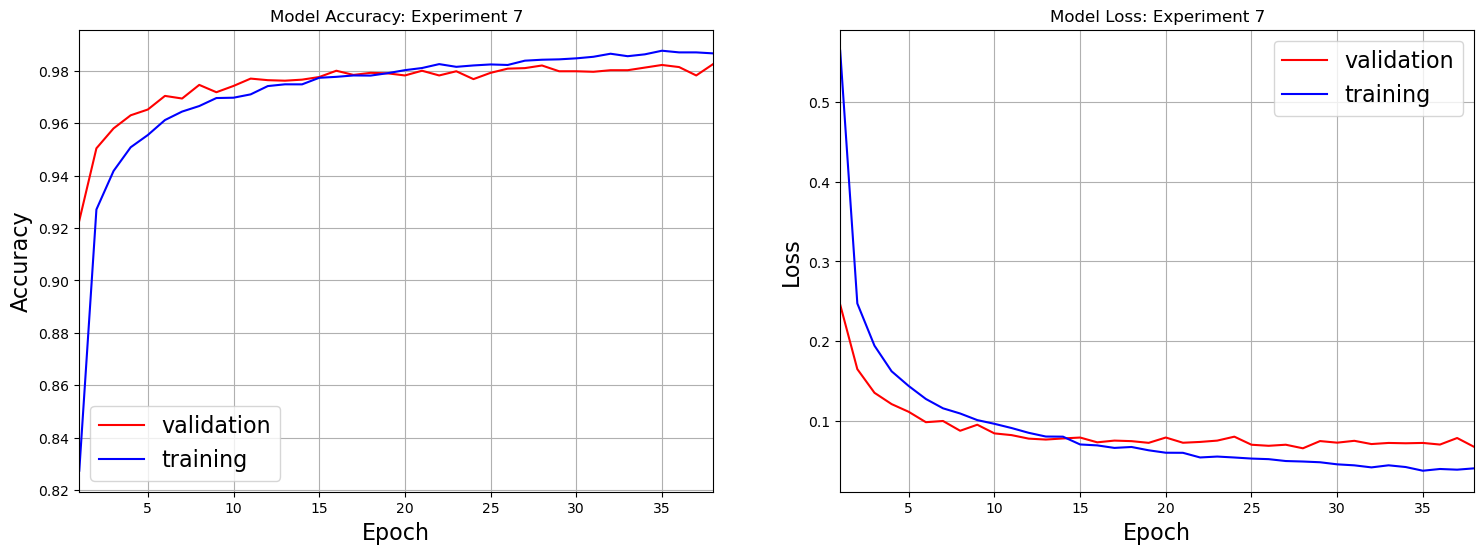

CPU times: total: 14min 37s
Wall time: 1min 15s


In [37]:
%%time
model_ex7, history_ex7 = training_wrapper(
    ex_num=7,
    model=model_ex7,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [38]:
y_pred_ex7 = evaluation_wrapper(
    ex_num=7,
    model=model_ex7,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 7...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.996
Test Accuracy: 0.9822

Confusion Matrix:
[[ 961    0    1    1    1    1    9    1    3    2]
 [   0 1128    1    1    0    1    2    0    2    0]
 [   0    2 1016    4    1    0    1    5    3    0]
 [   0    0    1  995    0    3    0    6    3    2]
 [   0    1    3    0  959    0    4    4    2    9]
 [   2    0    0    5    1  878    2    0    2    2]
 [   2    2    0    0    4    5  945    0    0    0]
 [   1    3    8    1    0    0    0 1010    1    4]
 [   2    0    1    8    2    3    2    5  948    3]
 [   1    2    0    9    5    3    1    5    1  982]]

***************************************************************************************
**************

## Experiment 8
Create a deep feed forward network with the following characteristics:
- 2 hidden layers 
    - Hidden layer 1: neurons=300 
    - Hidden layer 2: neurons=100
- SGD Learning Rate: 0.5
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers)
    - Hidden layer 1: rate=0.5
    - Hidden layer 2: rate=0.1
- Max 50 epochs with early exit

### Construct and Compile Model

In [39]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex8 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])

optimizer_ex8 = tf.keras.optimizers.SGD(learning_rate=0.5)
loss_fn_ex8 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex8.compile(optimizer=optimizer_ex8, loss=loss_fn_ex8, metrics=['accuracy'])

model_ex8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trai

### Train Model

Starting Experiment 8...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.4013 - accuracy: 0.8751 - val_loss: 0.1709 - val_accuracy: 0.9490
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.2091 - accuracy: 0.9373 - val_loss: 0.1254 - val_accuracy: 0.9624
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1701 - accuracy: 0.9488 - val_loss: 0.1704 - val_accuracy: 0.9452
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1506 - accuracy: 0.9552 - val_loss: 0.1032 - val_accuracy: 0.9696
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1360 - accuracy: 0.9583 - val_loss: 0.1060 - val_accuracy: 0.9692
Epo

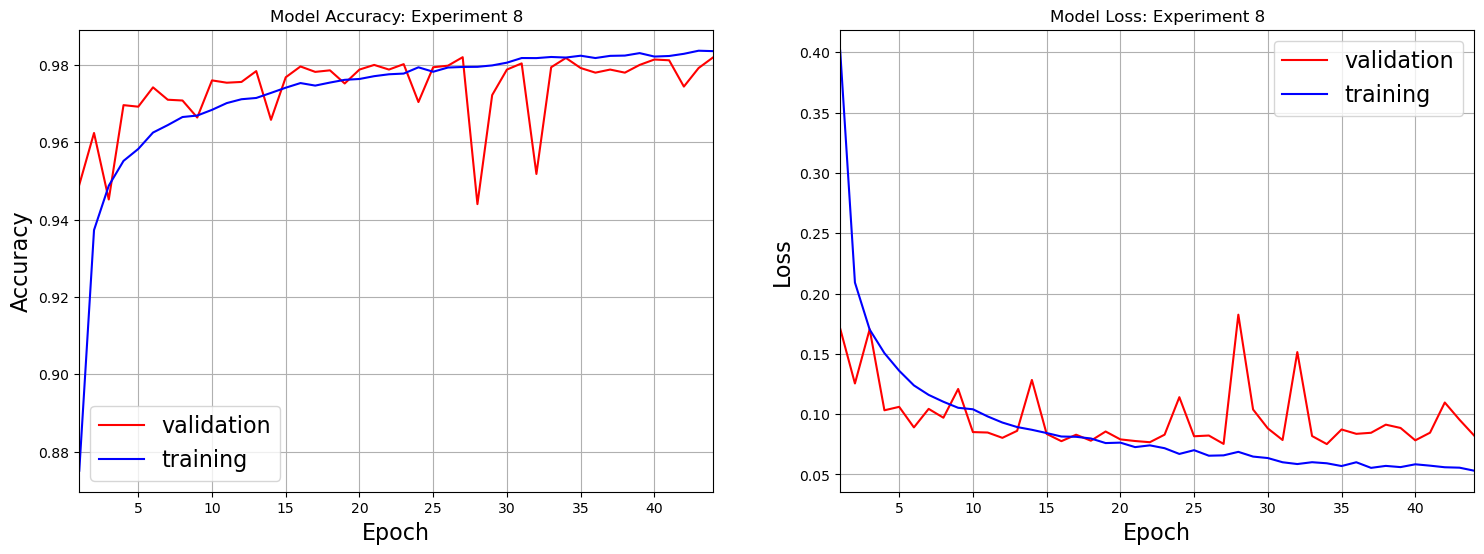

CPU times: total: 17min 29s
Wall time: 1min 32s


In [40]:
%%time
model_ex8, history_ex8 = training_wrapper(
    ex_num=8,
    model=model_ex8,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [41]:
y_pred_ex8 = evaluation_wrapper(
    ex_num=8,
    model=model_ex8,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 8...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9967
Test Accuracy: 0.982

Confusion Matrix:
[[ 972    0    1    0    0    1    2    2    2    0]
 [   0 1128    1    3    0    1    1    0    1    0]
 [   1    3 1016    3    0    0    4    3    1    1]
 [   0    0    3  997    0    1    0    3    2    4]
 [   0    0    2    0  963    0    4    1    0   12]
 [   2    0    0   12    0  864    6    1    4    3]
 [   3    2    1    0    1    4  945    0    2    0]
 [   1    3   10    4    0    0    0 1004    3    3]
 [   2    0    2    8    4    1    2    3  949    3]
 [   2    3    0    4   10    1    1    5    1  982]]

***************************************************************************************
**************

## Experiment 9
Create a deep feed forward network with the following characteristics:
- 10 hidden layers each with 100 neurons
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [42]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex9 = tf.keras.models.Sequential()
model_ex9.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

for i in range(10):
    model_ex9.add(
        tf.keras.layers.Dense(
            100, activation='relu', kernel_initializer='random_normal', name=f'hidden{i}'
        )
    )

model_ex9.add(
    tf.keras.layers.Dense(
        10, activation='softmax', kernel_initializer='random_normal', name='output'
    )
)

optimizer_ex9 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex9 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex9.compile(optimizer=optimizer_ex9, loss=loss_fn_ex9, metrics=['accuracy'])

model_ex9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden0 (Dense)             (None, 100)               78500     
                                                                 
 hidden1 (Dense)             (None, 100)               10100     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 hidden3 (Dense)             (None, 100)               10100     
                                                                 
 hidden4 (Dense)             (None, 100)               10100     
                                                                 
 hidden5 (Dense)             (None, 100)               1

### Train Model

Starting Experiment 9...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 2.3017 - accuracy: 0.1117 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 2/50
860/860 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 3/50
860/860 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3015 - val_accuracy: 0.1124
Epoch 4/50
860/860 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 5/50
860/860 [==============================] - 3s 3ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1124
Epo

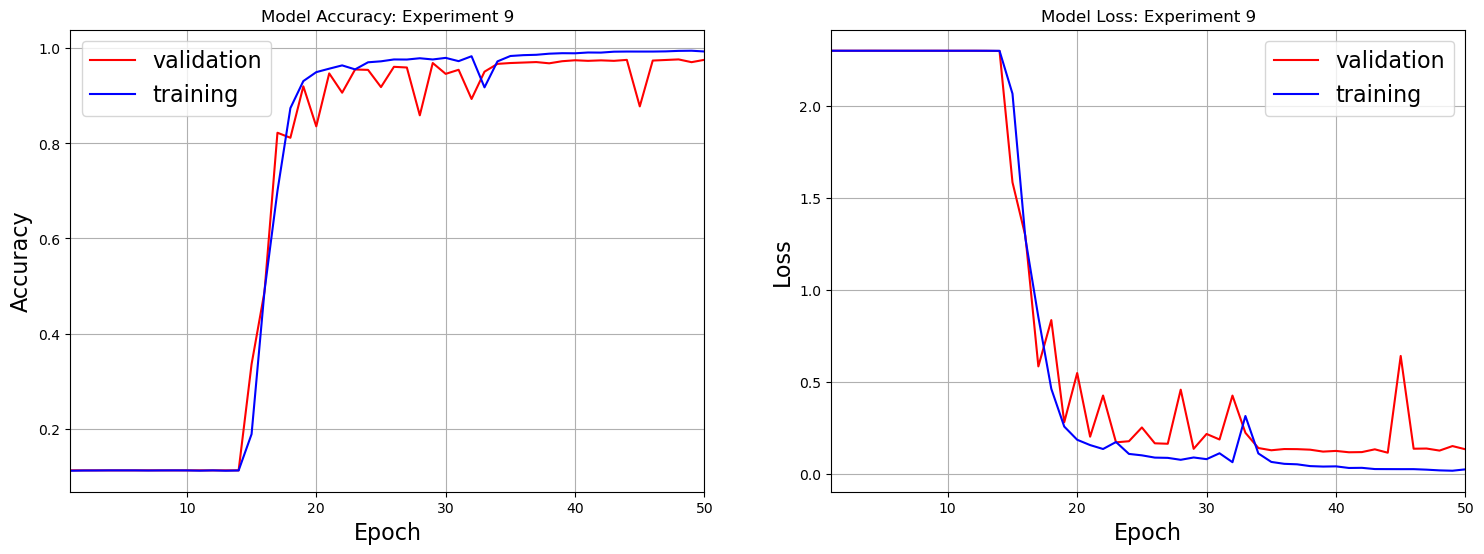

CPU times: total: 27min 35s
Wall time: 2min 20s


In [43]:
%%time
model_ex9, history_ex9 = training_wrapper(
    ex_num=9,
    model=model_ex9,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [44]:
y_pred_ex9 = evaluation_wrapper(
    ex_num=9,
    model=model_ex9,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 9...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9948
Test Accuracy: 0.9744

Confusion Matrix:
[[ 967    0    0    1    2    4    1    0    2    3]
 [   0 1115    4    1    0    0    2    0   13    0]
 [   4    0  998    9    0    0    4    5   11    1]
 [   0    0    1  998    0    3    0    2    4    2]
 [   0    2    2    0  960    1    4    4    1    8]
 [   4    1    0   12    1  854    8    2    8    2]
 [   5    3    0    0    2    5  941    0    2    0]
 [   1    3    8    8    1    1    2  988    3   13]
 [   4    1    0    7    1    3    2    2  948    6]
 [   1    2    0    8    7    7    1    3    5  975]]

***************************************************************************************
*************

## Experiment 10
Create a deep feed forward network with the following characteristics:
- 20 hidden layers each with 100 neurons
- SGD Learning Rate: 0.1
- kernel_initializer (all layers): random_normal
- activation (hidden layers): relu
- Dropout (hidden layers): None
- Max 50 epochs with early exit

### Construct and Compile Model

In [45]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex10 = tf.keras.models.Sequential()
model_ex10.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

for i in range(20):
    model_ex10.add(
        tf.keras.layers.Dense(
            100, activation='relu', kernel_initializer='random_normal', name=f'hidden{i}'
        )
    )

model_ex10.add(
    tf.keras.layers.Dense(
        10, activation='softmax', kernel_initializer='random_normal', name='output'
    )
)

optimizer_ex10 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex10 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex10.compile(optimizer=optimizer_ex10, loss=loss_fn_ex10, metrics=['accuracy'])

model_ex10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden0 (Dense)             (None, 100)               78500     
                                                                 
 hidden1 (Dense)             (None, 100)               10100     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 hidden3 (Dense)             (None, 100)               10100     
                                                                 
 hidden4 (Dense)             (None, 100)               10100     
                                                                 
 hidden5 (Dense)             (None, 100)               1

### Train Model

Starting Experiment 10...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 5s 5ms/step - loss: 2.3017 - accuracy: 0.1116 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 2/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 3/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1124
Epoch 4/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 5/50
860/860 [==============================] - 4s 5ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1124
Ep

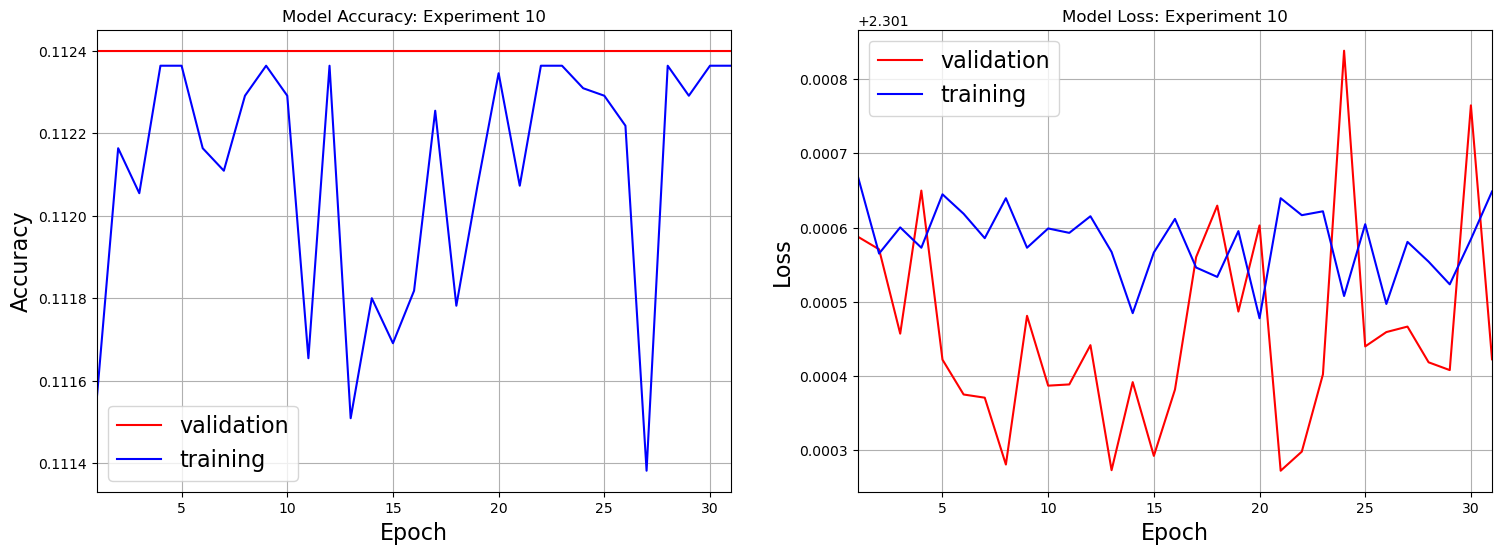

CPU times: total: 24min 57s
Wall time: 2min 9s


In [46]:
%%time
model_ex10, history_ex10 = training_wrapper(
    ex_num=10,
    model=model_ex10,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### Evaluating Trained Model

In [47]:
y_pred_ex10 = evaluation_wrapper(
    ex_num=10,
    model=model_ex10,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 10...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.1124
Test Accuracy: 0.1135

Confusion Matrix:
[[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]

***************************************************************************************
************

## Experiment 11
Create a deep feed forward network with the following characteristics:
- 4 hidden layers
    - Hidden layer 1: neurons=100
    - Hidden layer 2: neurons=300
    - Hidden layer 3: neurons=300
    - Hidden layer 4: neurons=100
- SGD Learning Rate: Determine an optimal value.
- kernel_initializer (all layers): Determine an optimal value.
- activation (hidden layers): Determine an optimal value.
- Dropout (hidden layers): Determine an optimal value.
- Max 50 epochs with early exit

### (01) Construct and Compile Model

In [48]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1101 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden1'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden2'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='random_normal', name='hidden3'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_normal', name='hidden4'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1101 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1101 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1101.compile(optimizer=optimizer_ex1101, loss=loss_fn_ex1101, metrics=['accuracy'])

model_ex1101.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 hidden4 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 230,210
Trainable params: 230,210
Non-trai

### (01) Train Model

Starting Experiment 1101...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.6537 - accuracy: 0.7839 - val_loss: 0.2341 - val_accuracy: 0.9296
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.1815 - val_accuracy: 0.9454
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1137 - accuracy: 0.9655 - val_loss: 0.1188 - val_accuracy: 0.9634
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.1106 - val_accuracy: 0.9654
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.1136 - val_accuracy: 0.9636


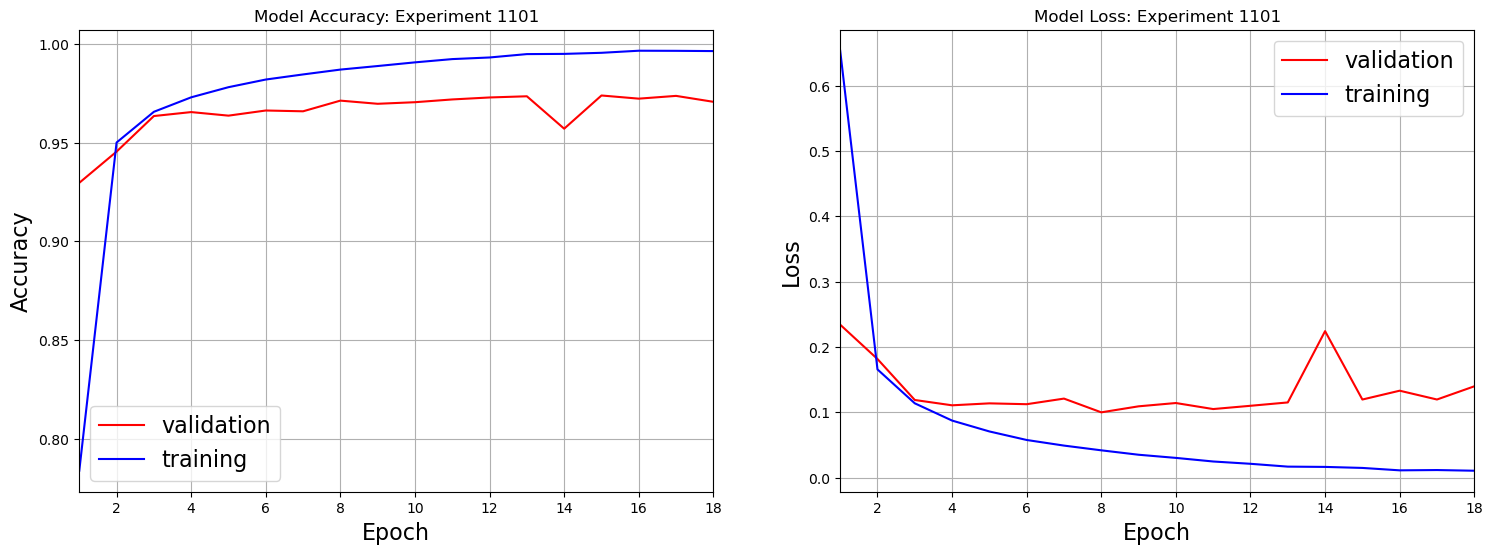

CPU times: total: 7min 5s
Wall time: 36.8 s


In [49]:
%%time
model_ex1101, history_ex1101 = training_wrapper(
    ex_num=1101,
    model=model_ex1101,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (01) Evaluating Trained Model

In [50]:
y_pred_ex1101 = evaluation_wrapper(
    ex_num=1101,
    model=model_ex1101,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1101...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9905
Test Accuracy: 0.9759

Confusion Matrix:
[[ 973    0    0    1    0    1    1    1    3    0]
 [   0 1126    1    2    0    0    1    0    5    0]
 [   6    2  991   12    6    0    3    5    7    0]
 [   0    0    1  994    0    2    0    3    6    4]
 [   1    0    0    0  970    0    5    3    0    3]
 [   2    0    0   12    1  865    4    0    6    2]
 [   7    3    0    1    8    9  925    0    5    0]
 [   1    4    6    3    0    0    0 1000    5    9]
 [   4    0    1    7    0    7    4    3  945    3]
 [   4    2    0    7   14    2    0    5    5  970]]

***************************************************************************************
**********

### (02) Construct and Compile Model

In [51]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1102 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1102 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1102 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1102.compile(optimizer=optimizer_ex1102, loss=loss_fn_ex1102, metrics=['accuracy'])

model_ex1102.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 hidden4 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 230,210
Trainable params: 230,210
Non-trai

### (02) Train Model

Starting Experiment 1102...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.3596 - accuracy: 0.8865 - val_loss: 0.1757 - val_accuracy: 0.9442
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1312 - accuracy: 0.9590 - val_loss: 0.1320 - val_accuracy: 0.9588
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0931 - accuracy: 0.9711 - val_loss: 0.1798 - val_accuracy: 0.9430
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.9771 - val_loss: 0.0971 - val_accuracy: 0.9716
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.1133 - val_accuracy: 0.9648


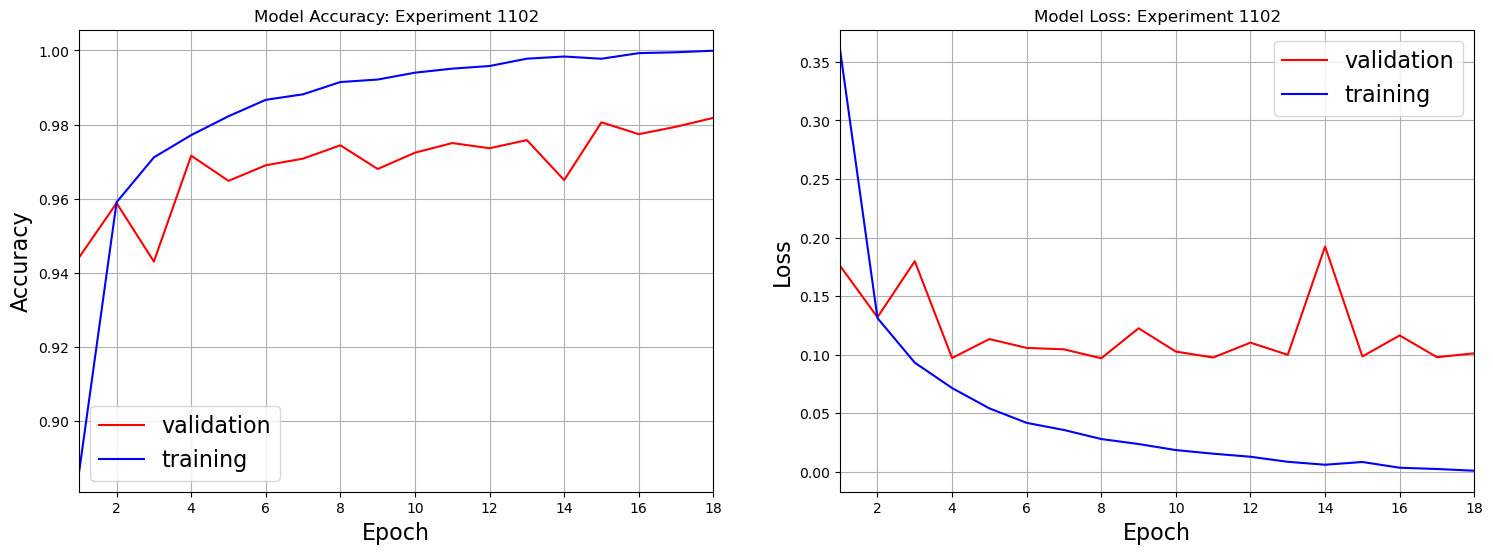

CPU times: total: 7min 11s
Wall time: 37.4 s


In [52]:
%%time
model_ex1102, history_ex1102 = training_wrapper(
    ex_num=1102,
    model=model_ex1102,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (02) Evaluating Trained Model

In [53]:
y_pred_ex1102 = evaluation_wrapper(
    ex_num=1102,
    model=model_ex1102,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1102...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9915
Test Accuracy: 0.9726

Confusion Matrix:
[[ 969    0    0    0    0    4    2    0    3    2]
 [   0 1123    0    2    0    1    2    1    6    0]
 [  10    1  968   33    4    1    3    4    7    1]
 [   0    0    0  997    0    6    0    2    3    2]
 [   0    1    2    1  952    0    3    5    0   18]
 [   2    0    0   18    0  865    2    1    3    1]
 [   4    2    1    1    3    7  935    0    5    0]
 [   0    5    8    8    0    0    0  995    2   10]
 [   4    0    1    8    1    7    0    2  948    3]
 [   2    1    0   14    4    4    1    7    2  974]]

***************************************************************************************
**********

### (03) Construct and Compile Model

In [54]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1103 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1103 = tf.keras.optimizers.SGD()
loss_fn_ex1103 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1103.compile(optimizer=optimizer_ex1103, loss=loss_fn_ex1103, metrics=['accuracy'])

model_ex1103.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 hidden4 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 230,210
Trainable params: 230,210
Non-trai

### (03) Train Model

In [55]:
# The following learning rate scheduler should get the learning rate down to 0.1 after ~15 epochs
lr_scheduler_ex1103 = tf.keras.callbacks.LearningRateScheduler(
    tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.5, decay_steps=1, decay_rate=0.90
    )
)

In [56]:
# Let's relax the early stopping criteria a bit to allow for the learning rate to decay
early_stopping_ex1103 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='auto',
    min_delta=0,
    patience=15,
    restore_best_weights=True
)

Starting Experiment 1103...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.5801 - accuracy: 0.8186 - val_loss: 0.2207 - val_accuracy: 0.9358 - lr: 0.5000
Epoch 2/50
860/860 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9522 - val_loss: 0.1772 - val_accuracy: 0.9460 - lr: 0.4500
Epoch 3/50
860/860 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9658 - val_loss: 0.1482 - val_accuracy: 0.9576 - lr: 0.4050
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.1182 - val_accuracy: 0.9654 - lr: 0.3645
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0674 - accurac

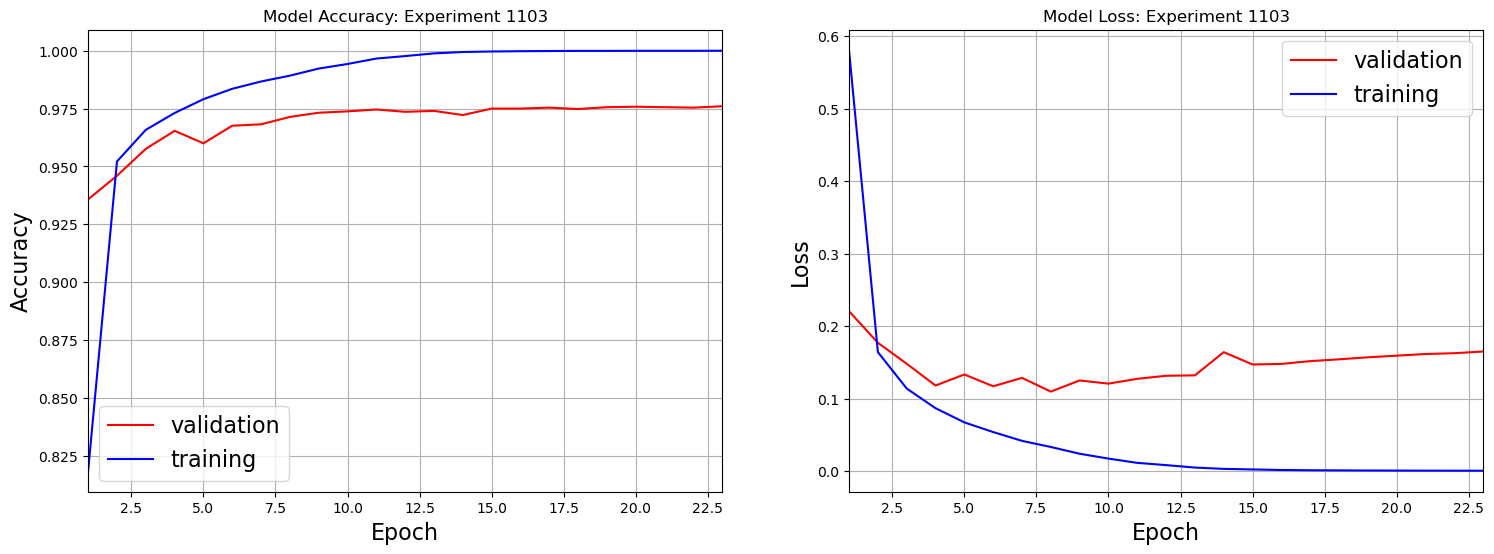

CPU times: total: 8min 48s
Wall time: 45.1 s


In [57]:
%%time
model_ex1103, history_ex1103 = training_wrapper(
    ex_num=1103,
    model=model_ex1103,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping_ex1103, lr_scheduler_ex1103]
)

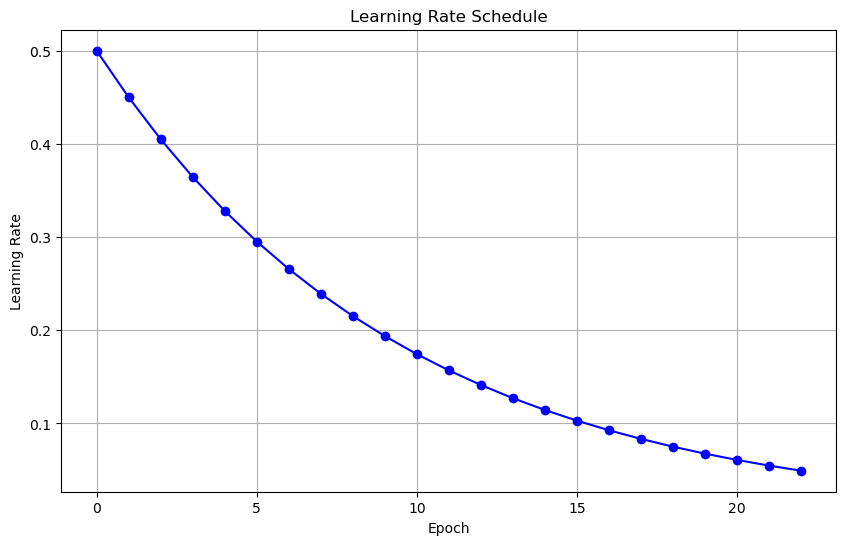

In [58]:
# Plot the learning rate schedule
plt.figure(figsize=(10, 6))
plt.plot(history_ex1103.epoch, history_ex1103.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.grid(True)
plt.show()


### (03) Evaluating Trained Model

In [59]:
y_pred_ex1103 = evaluation_wrapper(
    ex_num=1103,
    model=model_ex1103,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1103...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9909
Test Accuracy: 0.9711

Confusion Matrix:
[[ 970    1    1    1    0    1    1    2    2    1]
 [   0 1115    3    4    1    0    2    1    9    0]
 [   4    0  998   20    1    1    0    7    1    0]
 [   0    0    4  988    0    3    0    6    5    4]
 [   0    0    5    0  952    0    5    2    1   17]
 [   3    0    0   18    0  851    4    3    8    5]
 [  10    2    5    1    3    5  927    0    5    0]
 [   1    2    7    9    1    0    0  996    5    7]
 [   2    0    3    3    1    4    1    5  953    2]
 [   3    2    1    8   11    2    0    6   15  961]]

***************************************************************************************
**********

### (04) Construct and Compile Model

In [60]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1104 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1104 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1104 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1104.compile(optimizer=optimizer_ex1104, loss=loss_fn_ex1104, metrics=['accuracy'])

model_ex1104.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0

### (04) Train Model

Starting Experiment 1104...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.4383 - accuracy: 0.8641 - val_loss: 0.1951 - val_accuracy: 0.9374
Epoch 2/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1871 - accuracy: 0.9447 - val_loss: 0.1456 - val_accuracy: 0.9574
Epoch 3/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1450 - accuracy: 0.9556 - val_loss: 0.1377 - val_accuracy: 0.9574
Epoch 4/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1187 - accuracy: 0.9633 - val_loss: 0.1196 - val_accuracy: 0.9642
Epoch 5/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1049 - accuracy: 0.9674 - val_loss: 0.1159 - val_accuracy: 0.9644


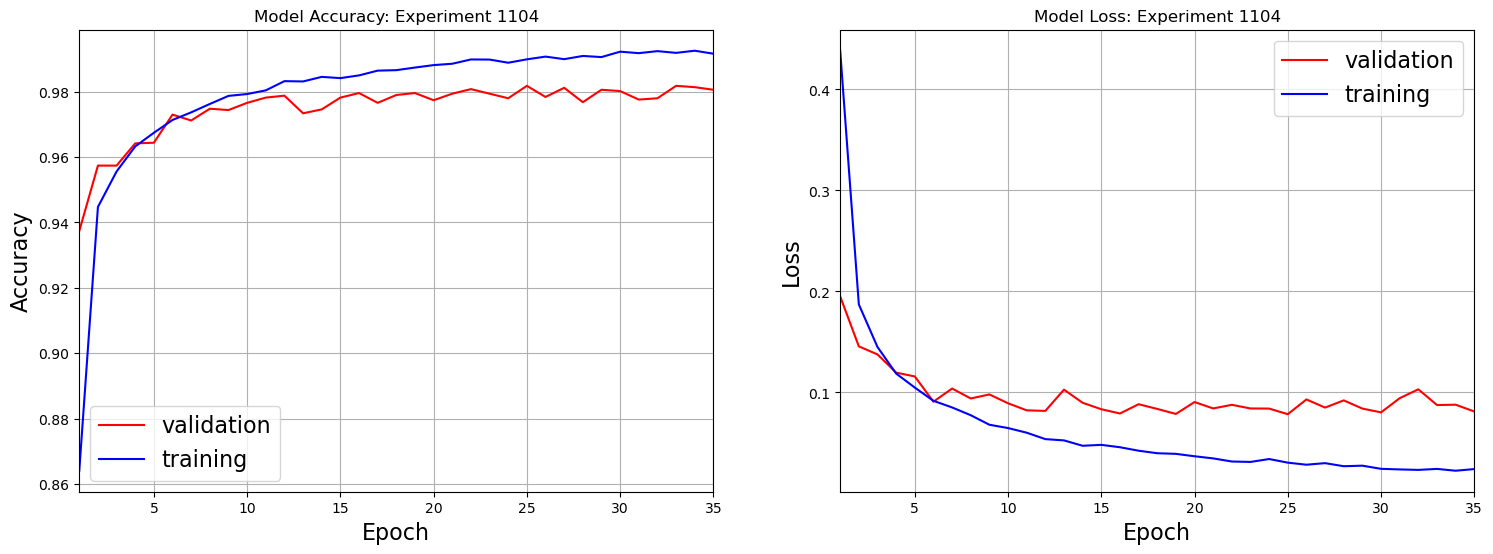

CPU times: total: 20min 15s
Wall time: 1min 46s


In [61]:
%%time
model_ex1104, history_ex1104 = training_wrapper(
    ex_num=1104,
    model=model_ex1104,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (04) Evaluating Trained Model

In [62]:
y_pred_ex1104 = evaluation_wrapper(
    ex_num=1104,
    model=model_ex1104,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1104...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9982
Test Accuracy: 0.9818

Confusion Matrix:
[[ 973    1    1    0    0    0    1    1    3    0]
 [   0 1125    1    1    1    1    2    0    4    0]
 [   2    0 1020    2    1    0    3    2    2    0]
 [   0    0    3  994    0    4    0    5    2    2]
 [   0    0    1    0  958    0    4    3    2   14]
 [   2    0    0    8    0  871    5    1    3    2]
 [   4    3    1    1    8    4  936    0    1    0]
 [   0    2    8    2    0    1    0 1006    5    4]
 [   4    0    4    6    2    2    2    5  947    2]
 [   2    2    0    5    6    0    1    3    2  988]]

***************************************************************************************
**********

### (05) Construct and Compile Model

In [63]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1105 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1105 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1105 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1105.compile(optimizer=optimizer_ex1105, loss=loss_fn_ex1105, metrics=['accuracy'])

model_ex1105.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0

### (05) Train Model

Starting Experiment 1105...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.6521 - accuracy: 0.7895 - val_loss: 0.2860 - val_accuracy: 0.9118
Epoch 2/50
860/860 [==============================] - 2s 3ms/step - loss: 0.2897 - accuracy: 0.9161 - val_loss: 0.1835 - val_accuracy: 0.9488
Epoch 3/50
860/860 [==============================] - 2s 3ms/step - loss: 0.2256 - accuracy: 0.9357 - val_loss: 0.1525 - val_accuracy: 0.9574
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1919 - accuracy: 0.9460 - val_loss: 0.1428 - val_accuracy: 0.9600
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1680 - accuracy: 0.9525 - val_loss: 0.1328 - val_accuracy: 0.9618


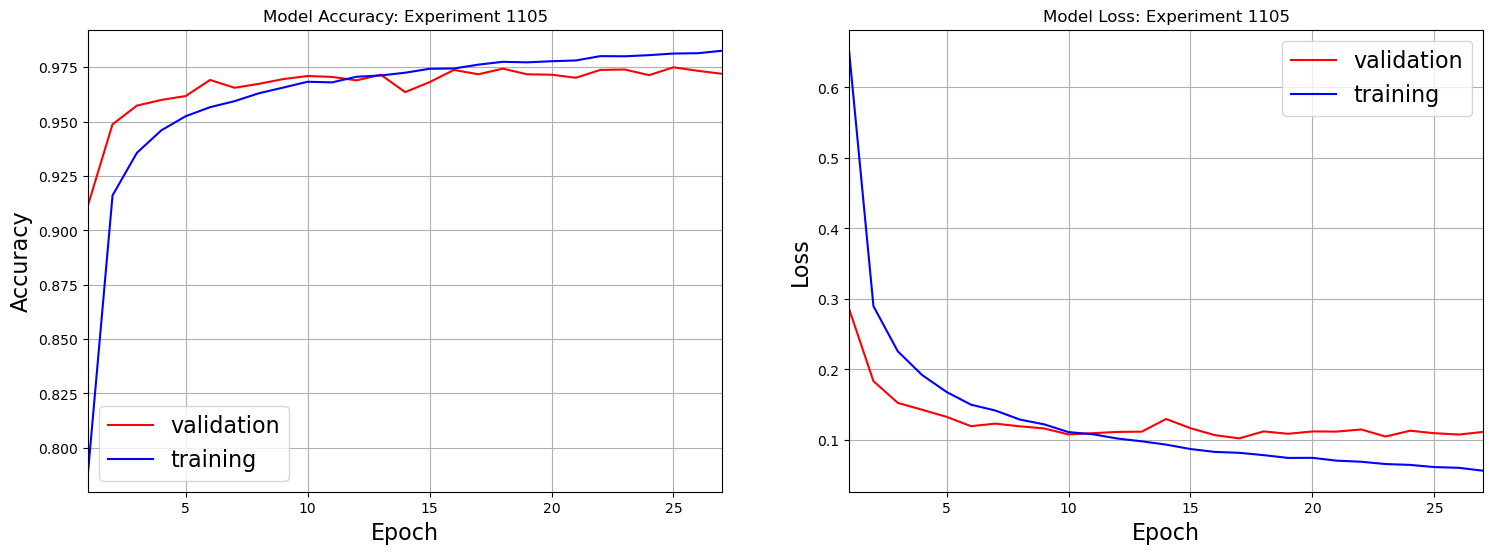

CPU times: total: 11min 20s
Wall time: 57.8 s


In [64]:
%%time
model_ex1105, history_ex1105 = training_wrapper(
    ex_num=1105,
    model=model_ex1105,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (05) Evaluating Trained Model

In [65]:
y_pred_ex1105 = evaluation_wrapper(
    ex_num=1105,
    model=model_ex1105,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1105...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9893
Test Accuracy: 0.974

Confusion Matrix:
[[ 972    0    2    0    0    1    1    1    3    0]
 [   0 1115    6    1    0    2    2    0    9    0]
 [   4    0 1014    4    1    0    2    4    3    0]
 [   0    0    8  985    0    6    0    5    3    3]
 [   1    0    4    0  952    0    7    2    6   10]
 [   5    0    0    8    0  861    6    2    8    2]
 [   5    2    0    1    4    6  934    0    6    0]
 [   2    1   14    1    0    0    0  997    4    9]
 [   4    0    7    7    4    3    1    4  942    2]
 [   5    2    1    8    9    4    1    5    6  968]]

***************************************************************************************
***********

### (06) Construct and Compile Model

In [66]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1106 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1106 = tf.keras.optimizers.SGD(learning_rate=0.1)
loss_fn_ex1106 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1106.compile(optimizer=optimizer_ex1106, loss=loss_fn_ex1106, metrics=['accuracy'])

model_ex1106.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0

### (06) Train Model

Starting Experiment 1106...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 3s 3ms/step - loss: 0.4184 - accuracy: 0.8700 - val_loss: 0.2487 - val_accuracy: 0.9252
Epoch 2/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1752 - accuracy: 0.9468 - val_loss: 0.1526 - val_accuracy: 0.9532
Epoch 3/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1308 - accuracy: 0.9600 - val_loss: 0.1426 - val_accuracy: 0.9574
Epoch 4/50
860/860 [==============================] - 2s 2ms/step - loss: 0.1064 - accuracy: 0.9680 - val_loss: 0.1143 - val_accuracy: 0.9676
Epoch 5/50
860/860 [==============================] - 2s 2ms/step - loss: 0.0911 - accuracy: 0.9723 - val_loss: 0.1049 - val_accuracy: 0.9686


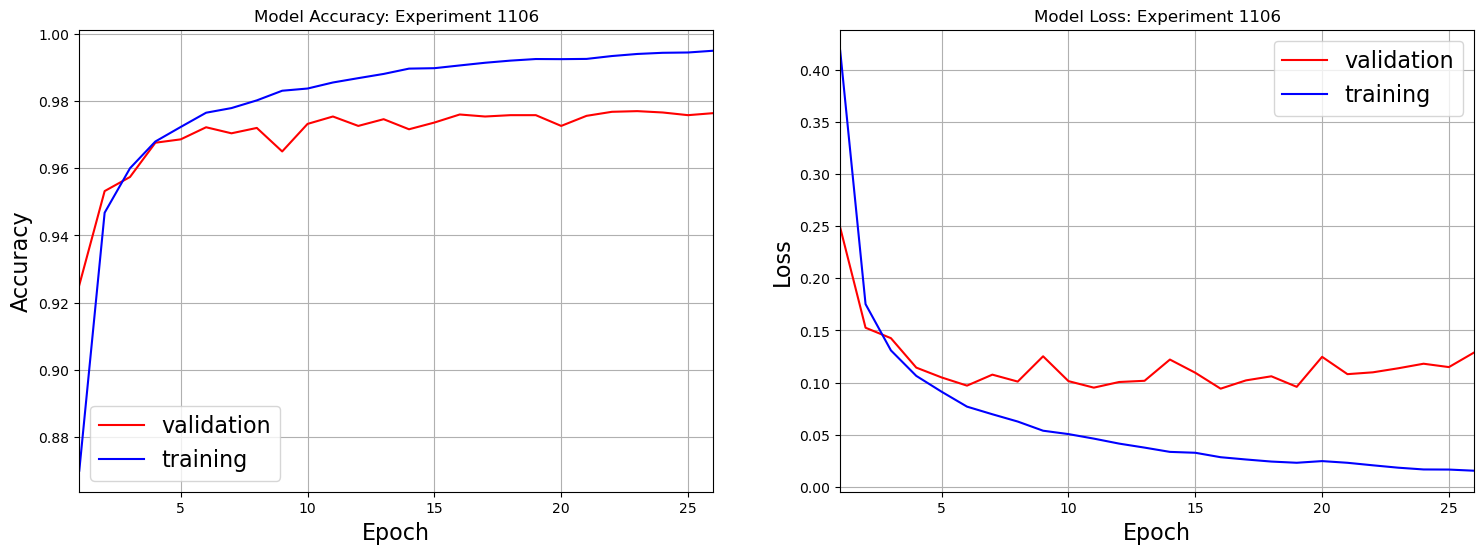

CPU times: total: 13min 13s
Wall time: 1min 8s


In [67]:
%%time
model_ex1106, history_ex1106 = training_wrapper(
    ex_num=1106,
    model=model_ex1106,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (06) Evaluating Trained Model

In [68]:
y_pred_ex1106 = evaluation_wrapper(
    ex_num=1106,
    model=model_ex1106,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1106...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9956
Test Accuracy: 0.9777

Confusion Matrix:
[[ 974    1    1    1    0    0    0    0    1    2]
 [   0 1125    3    2    0    1    1    1    2    0]
 [   2    0 1016    6    1    0    2    2    3    0]
 [   0    0    4  991    0    5    0    5    4    1]
 [   0    0    2    0  950    0    7    5    1   17]
 [   2    0    0   10    0  864    6    1    4    5]
 [   5    3    1    0    2    3  942    0    2    0]
 [   3    2   18    3    0    0    0  991    4    7]
 [   8    0    5    9    1    2    2    3  941    3]
 [   3    2    0    4    3    1    1    7    5  983]]

***************************************************************************************
**********

### (07) Construct and Compile Model

In [69]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1107 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1107 = tf.keras.optimizers.experimental.AdamW() # just use the defaults to try it out
loss_fn_ex1107 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1107.compile(optimizer=optimizer_ex1107, loss=loss_fn_ex1107, metrics=['accuracy'])

model_ex1107.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 hidden3 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0

### (07) Train Model

Starting Experiment 1107...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 4s 4ms/step - loss: 0.3799 - accuracy: 0.8831 - val_loss: 0.1682 - val_accuracy: 0.9500
Epoch 2/50
860/860 [==============================] - 3s 4ms/step - loss: 0.1572 - accuracy: 0.9544 - val_loss: 0.1311 - val_accuracy: 0.9608
Epoch 3/50
860/860 [==============================] - 2s 3ms/step - loss: 0.1211 - accuracy: 0.9646 - val_loss: 0.1125 - val_accuracy: 0.9684
Epoch 4/50
860/860 [==============================] - 3s 3ms/step - loss: 0.0979 - accuracy: 0.9712 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 5/50
860/860 [==============================] - 3s 3ms/step - loss: 0.0865 - accuracy: 0.9749 - val_loss: 0.1011 - val_accuracy: 0.9724


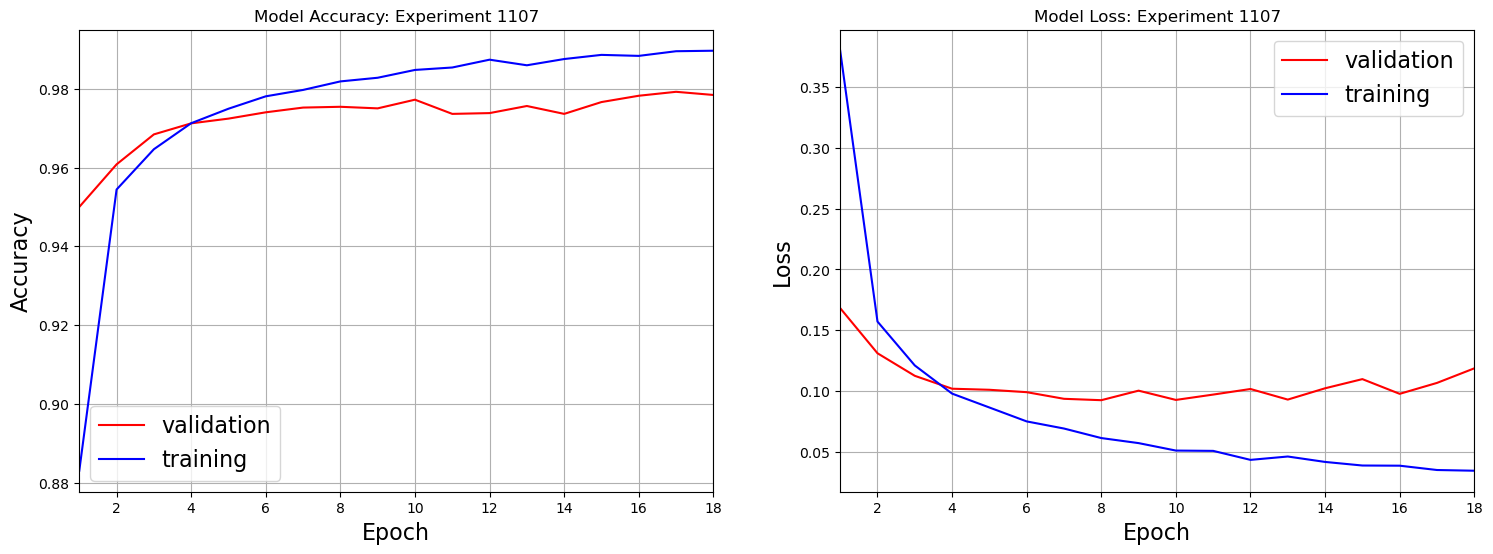

CPU times: total: 9min 33s
Wall time: 50.9 s


In [70]:
%%time
model_ex1107, history_ex1107 = training_wrapper(
    ex_num=1107,
    model=model_ex1107,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (07) Evaluating Trained Model

In [71]:
y_pred_ex1106 = evaluation_wrapper(
    ex_num=1106,
    model=model_ex1106,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1106...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9956
Test Accuracy: 0.9777

Confusion Matrix:
[[ 974    1    1    1    0    0    0    0    1    2]
 [   0 1125    3    2    0    1    1    1    2    0]
 [   2    0 1016    6    1    0    2    2    3    0]
 [   0    0    4  991    0    5    0    5    4    1]
 [   0    0    2    0  950    0    7    5    1   17]
 [   2    0    0   10    0  864    6    1    4    5]
 [   5    3    1    0    2    3  942    0    2    0]
 [   3    2   18    3    0    0    0  991    4    7]
 [   8    0    5    9    1    2    2    3  941    3]
 [   3    2    0    4    3    1    1    7    5  983]]

***************************************************************************************
**********

### (08) Construct and Compile Model

In [72]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

model_ex1108 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden1'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal', name='hidden3'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal', name='hidden4'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='random_normal', name='output')
])


optimizer_ex1108 = tf.keras.optimizers.SGD(0.1)
loss_fn_ex1108 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1108.compile(optimizer=optimizer_ex1108, loss=loss_fn_ex1108, metrics=['accuracy'])

model_ex1108.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                        

### (08) Train Model

Starting Experiment 1108...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
860/860 [==============================] - 4s 3ms/step - loss: 0.3216 - accuracy: 0.9036 - val_loss: 0.1431 - val_accuracy: 0.9542
Epoch 2/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1583 - accuracy: 0.9527 - val_loss: 0.1169 - val_accuracy: 0.9616
Epoch 3/50
860/860 [==============================] - 2s 3ms/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.0951 - val_accuracy: 0.9682
Epoch 4/50
860/860 [==============================] - 3s 3ms/step - loss: 0.1014 - accuracy: 0.9681 - val_loss: 0.0893 - val_accuracy: 0.9718
Epoch 5/50
860/860 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9723 - val_loss: 0.0895 - val_accuracy: 0.9718


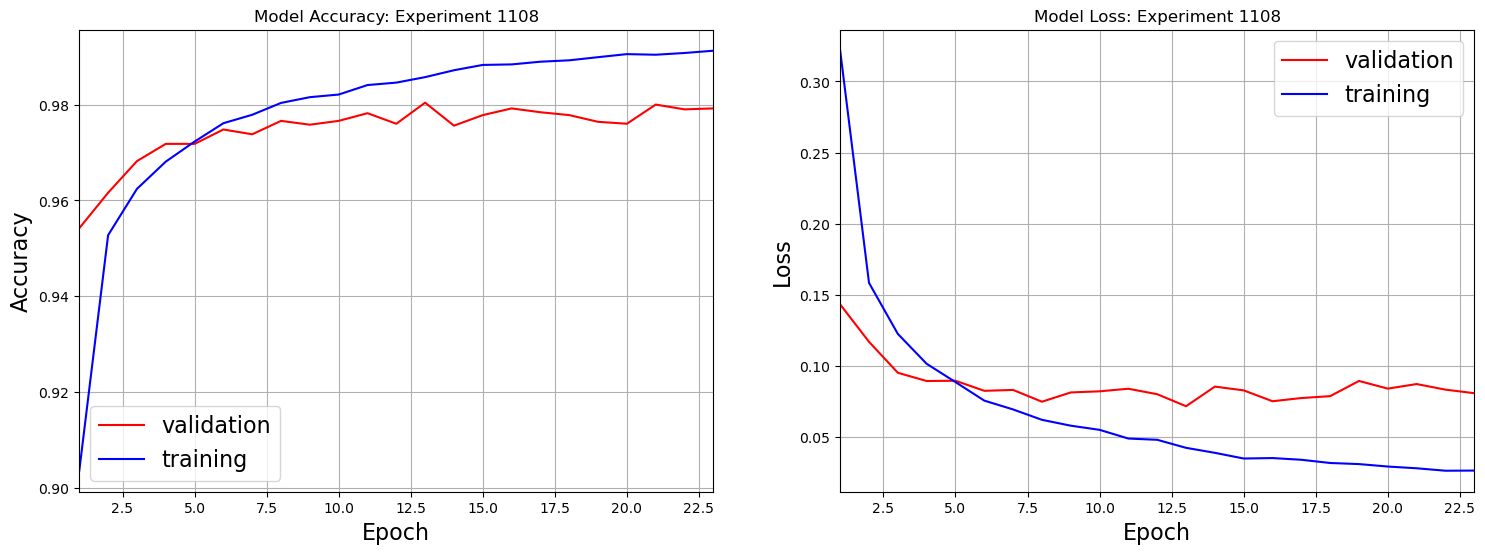

CPU times: total: 12min 42s
Wall time: 1min 5s


In [73]:
%%time
model_ex1108, history_ex1108 = training_wrapper(
    ex_num=1108,
    model=model_ex1108,
    n_epochs=50,
    batch_size=64,
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    cbs=[early_stopping]
)

### (08) Evaluating Trained Model

In [74]:
y_pred_ex1108 = evaluation_wrapper(
    ex_num=1108,
    model=model_ex1108,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1108...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9962
Test Accuracy: 0.9789

Confusion Matrix:
[[ 969    0    0    1    1    1    2    2    2    2]
 [   0 1128    1    1    0    1    2    0    2    0]
 [   6    1 1007    2    2    2    2    7    3    0]
 [   0    0    5  992    0    4    0    5    2    2]
 [   1    0    0    1  949    0    5    4    1   21]
 [   2    0    0    9    1  862    8    2    3    5]
 [   6    3    2    0    3    4  935    0    4    1]
 [   1    5    3    4    0    0    0 1010    1    4]
 [   3    0    1    5    0    3    1    5  953    3]
 [   1    4    0    6    6    1    0    4    3  984]]

***************************************************************************************
**********

### (09) Construct and Compile Model

In [174]:
# Create a MLP feedforward neural network using Keras
np.random.seed(42)
tf.random.set_seed(42)

tf.keras.backend.clear_session()

regularizer = None
# regularizer = tf.keras.regularizers.l2(0.001)

model_ex1109 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(
        100, activation='swish', kernel_initializer='he_normal', name='hidden1', 
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(
        300, activation='swish', kernel_initializer='he_normal', name='hidden2', 
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        300, activation='swish', kernel_initializer='he_normal', name='hidden3', 
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        100, activation='swish', kernel_initializer='he_normal', name='hidden4', 
        kernel_regularizer=regularizer
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(
        10, activation='softmax', kernel_initializer='random_normal', name='output', 
        kernel_regularizer=regularizer
    ),
])


optimizer_ex1109 = tf.keras.optimizers.SGD() 
loss_fn_ex1109 = tf.keras.losses.SparseCategoricalCrossentropy()
model_ex1109.compile(optimizer=optimizer_ex1109, loss=loss_fn_ex1109, metrics=['accuracy'])

model_ex1109.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 hidden2 (Dense)             (None, 300)               30300     
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hidden3 (Dense)             (None, 300)               9

### (09) Train Model

In [175]:
lr_scheduler_ex1109 = tf.keras.callbacks.LearningRateScheduler(
    tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.6, decay_steps=1, decay_rate=0.95
    )
)

lr_scheduler_ex1109 = tf.keras.callbacks.LearningRateScheduler(
    tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        # boundaries=[9], values=[0.5, 0.01]
        boundaries=[5,7], values=[0.5, 0.05, 0.01]
    )
)

Starting Experiment 1109...

**************************************************************************************
********************************    TRAINING MODEL    ********************************
**************************************************************************************
Epoch 1/50
966/966 [==============================] - 5s 5ms/step - loss: 0.2225 - accuracy: 0.9334 - val_loss: 0.1100 - val_accuracy: 0.9674 - lr: 0.5000
Epoch 2/50
966/966 [==============================] - 3s 3ms/step - loss: 0.1058 - accuracy: 0.9678 - val_loss: 0.1065 - val_accuracy: 0.9680 - lr: 0.5000
Epoch 3/50
966/966 [==============================] - 4s 4ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0897 - val_accuracy: 0.9740 - lr: 0.5000
Epoch 4/50
966/966 [==============================] - 4s 4ms/step - loss: 0.0595 - accuracy: 0.9812 - val_loss: 0.0880 - val_accuracy: 0.9746 - lr: 0.5000
Epoch 5/50
966/966 [==============================] - 3s 4ms/step - loss: 0.0503 - accurac

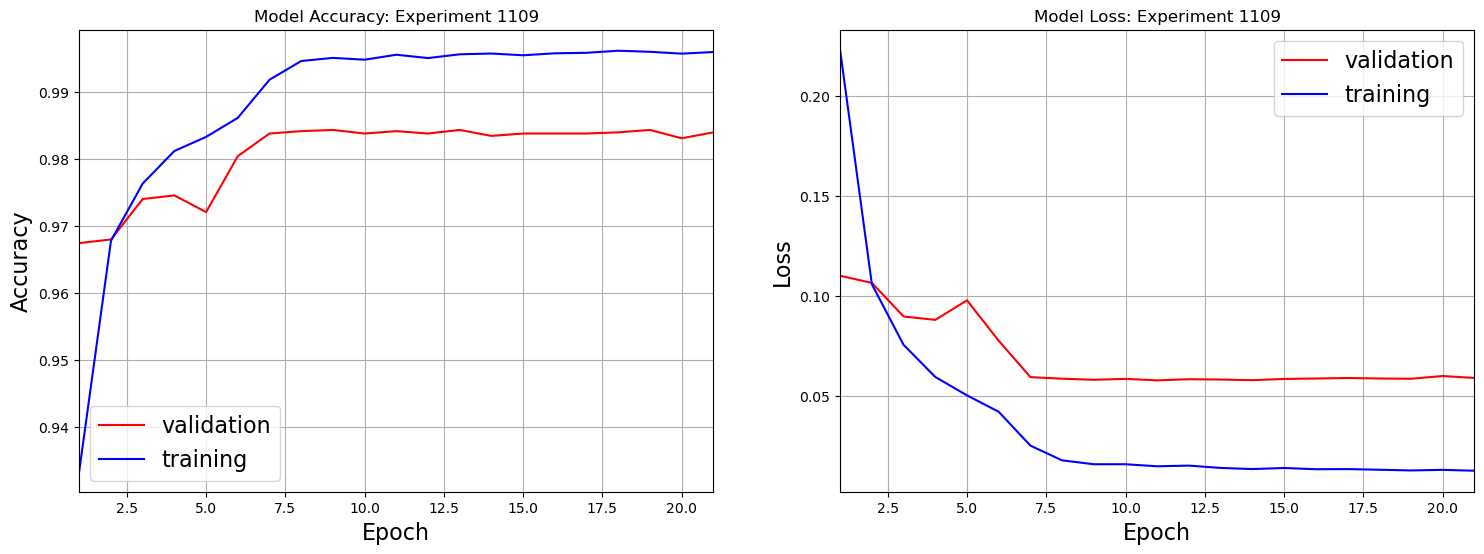

CPU times: total: 14min 58s
Wall time: 1min 19s


In [176]:
%%time
model_ex1109, history_ex1109 = training_wrapper(
    ex_num=1109,
    model=model_ex1109,
    n_epochs=50,
    batch_size=64,
    x_train=x_train_balanced,
    y_train=y_train_balanced,
    x_val=x_val_balanced,
    y_val=y_val_balanced,
    cbs=[early_stopping, lr_scheduler_ex1109]
)

### (09) Evaluating Trained Model

In [177]:
y_pred_ex1109 = evaluation_wrapper(
    ex_num=1109,
    model=model_ex1109,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    far_list=[0.01, 0.05, 0.1],
    plot_roc=False
)

Starting Evaluation for Experiment 1109...

**************************************************************************************
***************************    EVALUATING TRAINED MODEL    ***************************
**************************************************************************************

Train Accuracy: 0.9986
Test Accuracy: 0.9841

Confusion Matrix:
[[ 971    0    1    1    1    1    1    1    1    2]
 [   0 1127    1    1    0    2    1    2    1    0]
 [   4    0 1015    2    1    0    1    5    3    1]
 [   0    0    2  997    0    3    0    2    4    2]
 [   1    1    0    1  964    0    6    1    0    8]
 [   2    0    0    7    0  871    4    1    3    4]
 [   4    4    0    1    2    2  942    0    3    0]
 [   1    3    6    1    0    0    0 1011    3    3]
 [   2    0    2    4    0    3    0    5  955    3]
 [   2    2    0    4    6    0    0    4    3  988]]

***************************************************************************************
**********